## Flowers - categorization by species, data preparation

The problem is to classify images of flowers to ten categories. Data set contains 210 images of flowers.

In [29]:
import pandas as pd
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [2]:
# Load csv file with names and labels of images.
data = pd.read_csv('flower_labels.csv')
data.sample(5)

,file,label
53,0054.png,9
149,0150.png,3
80,0081.png,1
177,0178.png,4
83,0084.png,9


In [3]:
# Let's check how many labels do we have.
img_names = list(data['file'].values)
img_labels = list(data['label'].values)

create_folders = np.unique(list(data['label']))
create_folders

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
# Create folders named by labels in train in validation folders.
'''
source = os.getcwd()

for new_path in create_folders:
    if not os.path.exists('./%s' % new_path):
        os.makedirs('../data sets/Flower_by_color_categorization/train/%s' % new_path)
        os.makedirs('../data sets/Flower_by_color_categorization/validation/%s' % new_path)'''

"\n# Create folders named by labels in train in validation folders.\nsource = os.getcwd()\n\nfor new_path in create_folders:\n    if not os.path.exists('./%s' % new_path):\n        os.makedirs('../data sets/Flower_by_color_categorization/train/%s' % new_path)\n        os.makedirs('../data sets/Flower_by_color_categorization/validation/%s' % new_path)"

In [5]:
# Let's check how many images is in every label.
temp = pd.DataFrame(data.groupby('label').count())
temp.reset_index(inplace=True)
temp.columns = ['spieces','count']
temp

,spieces,count
0,0,21
1,1,20
2,2,19
3,3,22
4,4,21
5,5,25
6,6,23
7,7,15
8,8,26
9,9,18


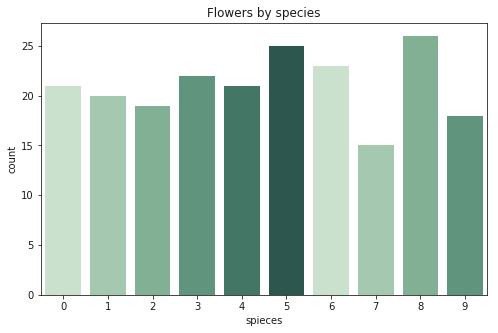

In [24]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (8, 5))
plt.title('Flowers by species')
sns.barplot(x="spieces", y="count", data=temp,
            label="Count", palette= sns.color_palette("ch:2.5,-.2,dark=.3"))
plt.show()

In [6]:
# Move files to the correct folders named by 
# label placed in train and validation folders. 
# I decided to move 3 images of each category to 
# validation set, which is fom 12 to 20% of data set.
'''
for num in create_folders:
    i = 0
    for f in range(len(data)):
        if data.label[f] == num:
            if i<3:
                shutil.move("flowers/%s" % data.file[f], "../data sets/Flower_by_color_categorization/validation/%s/%s" % (num,data.file[f]))
                i+=1
            else:
                shutil.move("flowers/%s" % data.file[f], "../data sets/Flower_by_color_categorization/train/%s/%s" % (num,data.file[f]))'''

'\n# Move files to the correct folders named by label placed in train and validation folders.\nfor num in create_folders:\n    i = 0\n    for f in range(len(data)):\n        if data.label[f] == num:\n            if i<3:\n                shutil.move("flowers/%s" % data.file[f], "../data sets/Flower_by_color_categorization/validation/%s/%s" % (num,data.file[f]))\n                i+=1\n            else:\n                shutil.move("flowers/%s" % data.file[f], "../data sets/Flower_by_color_categorization/train/%s/%s" % (num,data.file[f]))'

0 - Geranium <br/>
1 - Rose<br/>
2 - English marigold<br/>
3 - Viola<br/>
4 - Daisy<br/>
5 - Trillium<br/>
6 - Iris<br/>
7 - Dandelion<br/>
8 - Dahlia<br/>
9 - Tiger lily<br/>

In [31]:
species = ['Geranium', 'Rose', 'English merigold', 'Viola', 'Daisy', 
           'Trillium', 'Iris', 'Dandelion', 'Dahlia', 'Tiger Lily']

Sample of Geranium flower with label 0.


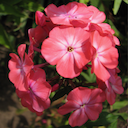

Sample of Rose flower with label 1.


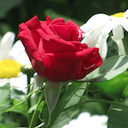

Sample of English merigold flower with label 2.


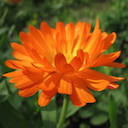

Sample of Viola flower with label 3.


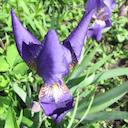

Sample of Daisy flower with label 4.


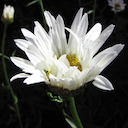

Sample of Trillium flower with label 5.


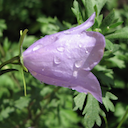

Sample of Iris flower with label 6.


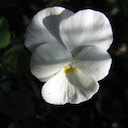

Sample of Dandelion flower with label 7.


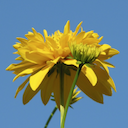

Sample of Dahlia flower with label 8.


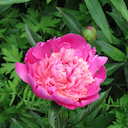

Sample of Tiger Lily flower with label 9.


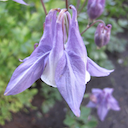

In [39]:
for num in create_folders:
    i = 0
    for f in range(len(data)):
        if data.label[f] == num and i==0:
            print('Sample of %s flower with label %d.' % (species[num],num))
            display(Image(filename=
                          '../data sets/Flower_by_color_categorization/validation/%s/%s' % (num, data.file[f])))
            i+=1  